# Starting the prediction

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("6 class csv.csv");

In [2]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [4]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [5]:
df['Star type'].value_counts(), df['Spectral Class'].value_counts()

(Star type
 0    40
 1    40
 2    40
 3    40
 4    40
 5    40
 Name: count, dtype: int64,
 Spectral Class
 M    111
 B     46
 O     40
 A     19
 F     17
 K      6
 G      1
 Name: count, dtype: int64)

The features we have here are a few properties of a star:

Absolute Temperature (in K) Temperature of the Star in Kelvin
Relative Luminosity (L/Lo) Relative Luminosity is the ratio of brightness (Luminosity) of the star with the brightness of the Sun.
Relative Radius (R/Ro) Relative Radius is again the ratio of the radius of a star compared to the radius of the Sun.
Absolute Magnitude (Mv) Absolute magnitude (M) is a measure of the luminosity of a celestial object, on an inverse logarithmic astronomical magnitude scale.
Star Color (white,Red,Blue,Yellow,yellow-orange etc) Self explainatory. It is the colour of Star as it appears in the sky.
Spectral Class (O,B,A,F,G,K,,M) It is basically a class in which a star falls based on most of the above features.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#checking correlation between variables for PCA
sns.heatmap(data = df.corr(), annot = True)

ValueError: could not convert string to float: 'Red'

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Star color'] = le.fit_transform(df['Star color'])
df['Spectral Class'] = le.fit_transform(df['Spectral Class'])

In [11]:
features = df.drop(['Star type', 'Star color', 'Spectral Class'], axis=1)
labels = df['Star type']

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_train_features = sc.fit_transform(features)

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

Text(0.5, 0, 'Principal Component Number')

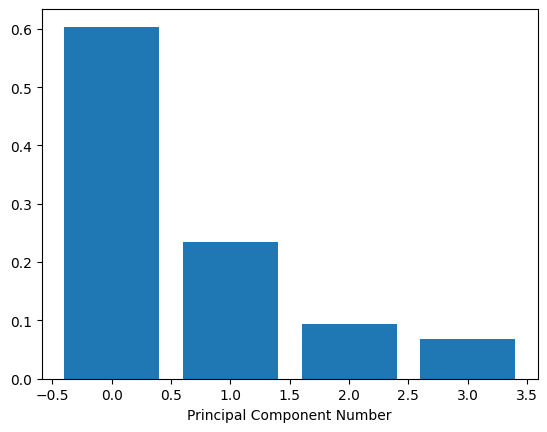

In [14]:
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component Number')

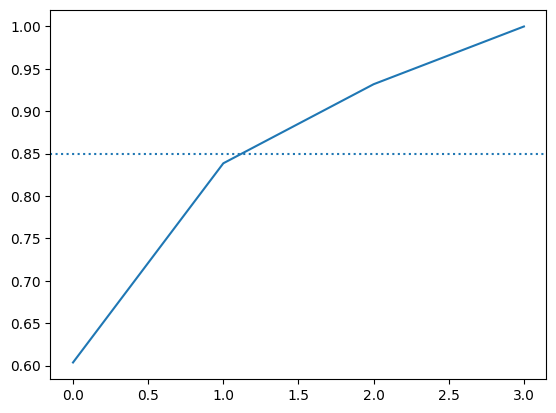

In [16]:
cum_exp_variance = np.cumsum(exp_variance)
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle=':')

In [17]:
n_component = 2

pca = PCA(n_component, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

# Model Building

In [18]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)
dt.fit(train_features, train_labels)
pred_labels_tree = dt.predict(test_features)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logreg = logreg.predict(test_features)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)
rfc.fit(train_features, train_labels)

RandomForestClassifier(random_state=10)

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10)

tree = DecisionTreeClassifier()
logreg = LogisticRegression()
clf = RandomForestClassifier()

tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)
rt_score = cross_val_score(clf,pca_projection, labels, cv=kf)

# Mean of all the score arrays
print("Decision Tree:", np.mean(tree_score),"Logistic Regression:", np.mean(logit_score),"Random Forest:",np.mean(rt_score))

Decision Tree: 0.8791666666666667 Logistic Regression: 0.8666666666666668 Random Forest: 0.9041666666666666


In [ ]:
print('Model Prediction Complete')